# 필요 라이브러리 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# train 데이터 불러오기

In [4]:
df = pd.read_csv('./data/titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'PassengerId' : 탑승자 데이터 일련 번호

'Survived' : 생존 여부, 0 - 사망, 1 - 생존

'Pclass' : 티켓의 선실 등급, 1 - 일등석, 2 - 이등석, 3 - 삼등석

'Name' : 탑승자 이름

'Sex' : 탑승자 성별

'Age' : 탑승자 나이

'SibSp' : 같이 탑승한 형제자매 또는 배우자 인워수

'Parch' : 같이 탑승한 부모님 또는 어린이 인원수

'Ticket' : 티켓 번호

'Fare' : 요금

'Cabin' : 선실 번호

'Embarked' : 중간 정착 항구, C - Cherbourg, Q - Queenstown, S - Southampton

# 데이터 처리

## nan 값 처리

In [7]:
# 데이터 col의 type을 확인 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


=> age, cabin, embarked에 누락값이 있다 

- age는 평균 나이

- cabin, embarked는 'N'값으로 변경

In [13]:
# 나이를 평균값으로 
df['Age'].fillna(df['Age'].mean(), inplace = True)

# cabin, embarked를 'N'으로
df['Cabin'].fillna('N', inplace = True)
df['Embarked'].fillna('N', inplace = True)

print('데이터 nan 값 : ', df.isnull().sum().sum())

데이터 nan 값 :  0


## 문자열 확인 

In [17]:
df['Sex'].value_counts()
df['Cabin'].value_counts()
df['Embarked'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

=> cabin의 경우 N이 많고 선실이 여러개인 경우(C23 C25 C27)가 존재한다

- 선실의 등급을 표시하는 첫 번째 알파벳만 사용

In [20]:
df['Cabin'] = df['Cabin'].str[:1]

df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

## 생존에 영향이 있는 변수  확인

### 성별이 생존에 영향이 있는지

In [22]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

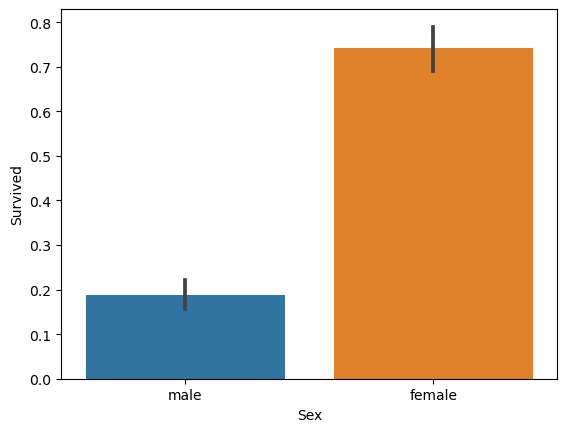

In [23]:
sns.barplot(x = df['Sex'], y = df['Survived'])

=> 탑승자는 남자가 더 많다

=> 여자는 233 / 314로 약 74.2%가 생존

=> 남자는 468 / 577로 약 18.8%가 생존

### 객실 등급과 성별이 생존에 영향이 있는지

In [27]:
df.groupby(['Pclass', 'Sex', 'Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

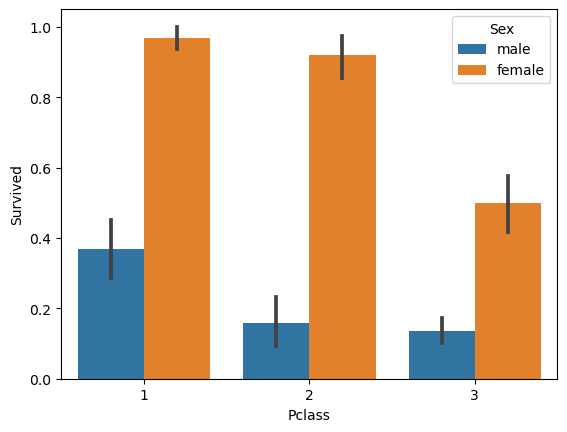

In [26]:
sns.barplot(x = df['Pclass'], y = df['Survived'], hue = df['Sex'])

=> 여성은 3등급에서 생존 확률이 떨어진다

=> 남성은 1등급에서 생존 확률이 높다

### 나이와 성별이생존에 영향이 있는지

범위를 분류해 카테고리 값을 할당

0 ~ 5 : Baby

6 ~ 12 : Child

13 ~ 18 : Teenager

19 ~ 25 : Student

26 ~ 35 : Young Adult

35 ~ 60 : Adult

61 ~ : Elderly

-1 이하의 오류 값 : Unknown

In [34]:
def age_change(age):

    if age <= -1 : 
        return 'Unknown'
    elif age <= 5:
        return 'Baby'
    elif age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 25:
        return 'Student'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'

In [35]:
df['Age_cat'] = df['Age'].map(age_change)

df['Age_cat'].head()

0        Student
1          Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: Age_cat, dtype: object

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age_cat', ylabel='Survived'>

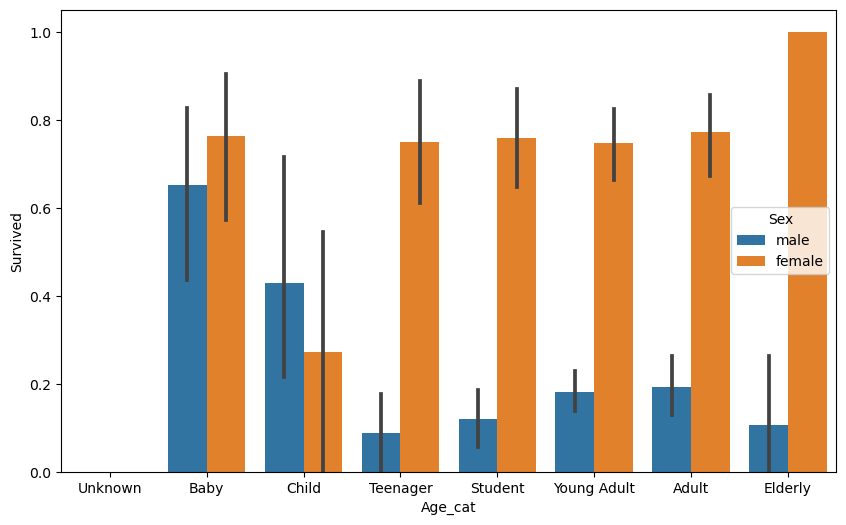

In [39]:
group_name = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']


plt.figure(figsize = (10, 6))
sns.barplot(x = df['Age_cat'], y = df['Survived'], hue = df['Sex'], order = group_name)


df.drop('Age_cat', axis = 1, inplace = True) # 필요없는 col 삭제

=> baby의 경우 생존 확률이 높다

=> 여자 child의 경우 생존 확률이 낮다

=> 여자 elderly의 경우 생존 확률이 가장 높다

=> sex, age, pclass등이 중요하게 생존을 좌우하는 feature이다 

## 범주형을 수치형으로 변환

In [42]:
from sklearn.preprocessing import LabelEncoder

def encode_features(data):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder() 
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])
    return data

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


# 전처리 과정을 함수로 만들기

test도 해야하는 과정이기 때문에

In [47]:
# null

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    
    return df

# 불필요한 col 제거

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    
    return df

# 레이블 encoding 수행

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫 알파벳만
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 생성한 데이터 전처리 함수 호출

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

# 모델링

원본 데이터를 다시 불러오고, feature 데이터 세트와 레이블 데이터 세트 추출

In [45]:
df = pd.read_csv('./data/titanic_train.csv')

y_df = df['Survived']
x_df = df.drop('Survived', axis = 1)

In [48]:
x_df = transform_features(x_df) # 위에서 한 데이터 가공 실행

## 학습 데이터 세트를 기반으로 테스트 데이터 세트 분할

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 11)

## 모델 생성

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Classifier 클래스 생성
dt = DecisionTreeClassifier(random_state = 11)
rf = RandomForestClassifier(random_state = 11)
lr = LogisticRegression(solver = 'liblinear')

## 모델 학습/예측/평가

In [54]:
# DecisionTreeClassifier

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier(random_state=11)

DecisionTreeClassifier 정확도 : 0.7877


RandomForestClassifier(random_state=11)

RandomForestClassifier 정확도 : 0.8547


LogisticRegression(solver='liblinear')

LogisticRegression 정확도 : 0.8659


=> 높은 정확도인 LogisticRegression를 사용

## 교차검증

In [55]:
# KFold 클래스 이용

from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5): # 폴드 세트를 5개인 kfold 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []# 폴스 수 만큼 예측결과 저장을 위한 리스트 객체 생성
    
    # kfold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_df)): # KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
        # x_df, y_df에서 교차 검증별 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = x_df.values[train_index], x_df.values[test_index]
        y_train, y_test = y_df.values[train_index], y_df.values[test_index]
        
        # classifier 학습, 예측, 정확도
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))
    
exec_kfold(dt, folds = 5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [59]:
# cross_val_score()이용

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, x_df, y_df, cv = 5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


## 최적의 파라미터 찾기

In [63]:
# GridSearchCV를 사용해 DecisionTreeClassifier의 최적의 파라미터 찾기

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5],
              'min_samples_leaf' : [1, 5, 8]}

grid_dclf = GridSearchCV(dt, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

GridSearchCV 최적 하이퍼파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992


In [64]:
# GridSearchCV의 최적 하이퍼파라미터로 학습된 Estimator로 예측 및 평가 수행

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
